# non-parametric correlation test
## Spearman's Rank Correlation
### Snowheight and Temperature - Version 1.0
---
data: montly mean from 1975 - 2015

---

# The Problem

A scientist decides to investigate if temperature change influences snow heights in the southern Austrian mountain range Karawanken between 1975 to 2015.

To investigate this question, the scientist collects the monthly mean temperature and snow heights from 1975 to 2015. 

He formulates the following hypothesis:

* $H_0$ : Temperature **does not** influence snow heights $\rightarrow \rho = 0 \rightarrow$ there is **no linear dependence** between the two data sets
* $H_A$ : Temperature **does** influence snow heights $\rightarrow  "\rho \neq 0" \rightarrow$ there is **linear dependence** between the two data sets

To investigate this question, a scientist wants to perform a **correlation test**. 

Since he is aware the fact, that temperature and snow height data are not normally distributed, he correctly chooses a non-parametric correlation test. Namely, the rank based **Spearman's Rank Correlation**. 

Thus, the scientist,
* 1.) collects monthly mean temperature and snow height data.
* 2.) ranks them seperately.
* 3.) calculates the **Spearman's Rank Correlation Coefficient**.
* 4.) finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$.

The scientist will decied as followed:
* Reject $H_0$ if $|z| > z_{\alpha/2}$    
* Accept $H_0$ if $|z| < z_{\alpha/2}$  

# The implementation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from scipy import stats

from scipy.stats import norm
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import kendalltau

### 1.) & 2.) One collects monthly mean temperature and snow height data and ranks them sepaerately.

To do so, he firstly collects the temperature and snow height data from 1975 to 2015

In [6]:
# define file path
filename1 = '/home/martin/uni/10_Semester/analys_methods_in_climate_science/project/non_parametric_statistics/InitialData/SHZell.csv'
filename2 = '/home/martin/uni/10_Semester/analys_methods_in_climate_science/project/non_parametric_statistics/InitialData/TZell.csv'

# define period
start_date = '1975-01-01'
end_date = '2015-01-01'

# read csv and store it in pandas dataframe !!!change to universal name!!!
df_1 = pd.read_csv(filename1, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Height'), encoding = "ISO-8859-1")
df_2 = pd.read_csv(filename2, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Temperature'), encoding = "ISO-8859-1")

# make sure that numbers are float not object type
df_1 = df_1.rename(columns={'Height': 'data_1'})
df_1['data_1'] = pd.to_numeric(df_1['data_1'].str.replace(',', '.'))

# rename columns
df_2 = df_2.rename(columns={'Temperature': 'data_2'})
df_2['data_2'] = pd.to_numeric(df_2['data_2'].str.replace(',', '.'))


# merge both df in one frame and set date as index
df_merged = pd.merge(df_1, df_2, on=['Date'])
df_merged = df_merged[["Date", "data_1", "data_2"]]


df_merged['Date'] = pd.to_datetime(df_merged['Date'], format='%d.%m.%Y')
df_merged.set_index('Date', inplace=True)

# filter after predefined period
df_filtered = df_merged[start_date : end_date]

print(df_filtered)

            data_1  data_2
Date                      
1975-01-01     0.0     1.8
1975-01-02     0.0     1.9
1975-01-03     0.0    -1.1
1975-01-04     0.0    -0.6
1975-01-05     0.0     0.4
...            ...     ...
2014-12-28    17.0    -6.1
2014-12-29    21.0    -7.5
2014-12-30    20.0    -8.6
2014-12-31    21.0   -10.2
2015-01-01    21.0    -4.7

[14611 rows x 2 columns]


Secondly, he averages the daily values to acquire the montly mean temperature and snowheight.

In [7]:
# resample to monthly frequency
df_monthly = df_filtered.resample('M').mean()

# modify index
df_monthly.index = df_monthly.index.to_period('M')

df = df_monthly
print(df)

            data_1     data_2
Date                         
1975-01   0.129032   0.803226
1975-02   1.178571  -0.896429
1975-03  10.225806   2.264516
1975-04   9.100000   6.380000
1975-05   0.000000  13.148387
...            ...        ...
2014-09   0.000000  11.443333
2014-10   0.000000   9.029032
2014-11   0.000000   5.143333
2014-12   3.000000  -0.196774
2015-01  21.000000  -4.700000

[481 rows x 2 columns]


And finally, one ranks the two data sets seperately.
> In addition, he visualizes the data to get a deeper understanding of it

In [8]:
# create a new DataFrame with the ranks
df_rank = df.rank(method='average')
print(df_rank)

         data_1  data_2
Date                   
1975-01   254.0   131.5
1975-02   285.0    89.0
1975-03   355.0   158.0
1975-04   350.0   227.0
1975-05   124.5   346.0
...         ...     ...
2014-09   124.5   306.0
2014-10   124.5   277.0
2014-11   124.5   206.0
2014-12   306.0   108.0
2015-01   402.0    13.0

[481 rows x 2 columns]


Slope: -0.209
Intercept: 9.12


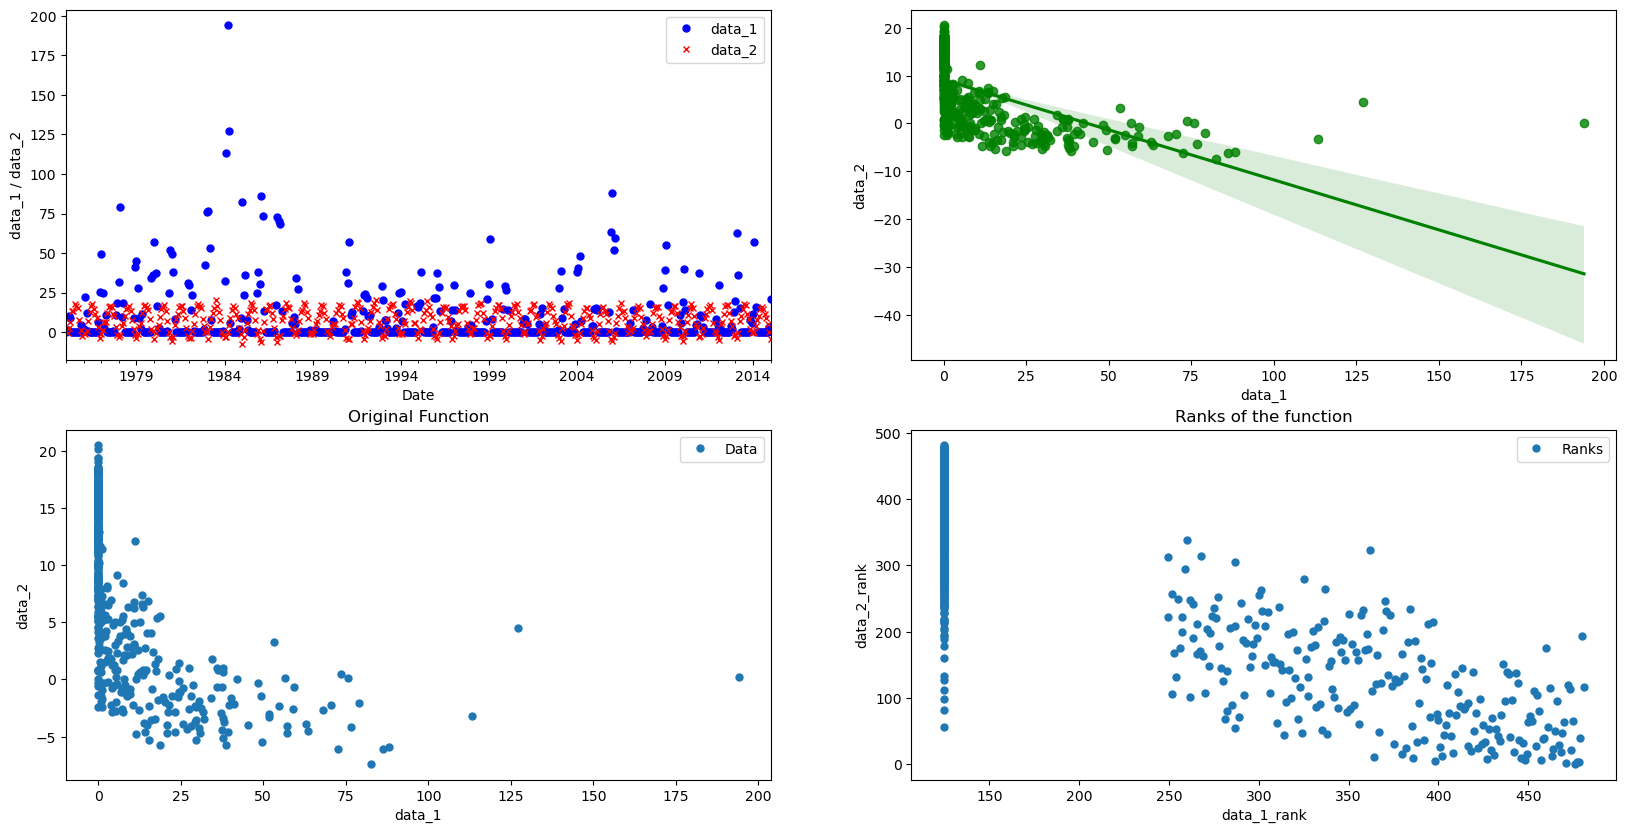

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
df.plot(kind='line', y='data_1', ax=ax[0,0], marker='o', linestyle='', color='blue', markersize=5)
df.plot(kind='line', y='data_2', ax=ax[0,0], marker='x', linestyle='', color='red', markersize=5)
ax[0,0].set_ylabel('data_1 / data_2')
ax[0,0].legend(['data_1', 'data_2'])

sns.regplot(x='data_1', y='data_2', data=df, ax=ax[0,1], color='green')
ax[0,1].set_xlabel('data_1')
ax[0,1].set_ylabel('data_2')

# Plot the original dataframe
ax[1,0].plot(df['data_1'], df['data_2'], label=f'Data',marker='o', markersize=5, linestyle='', linewidth = 0.5)
ax[1,0].set_title('Original Function')
ax[1,0].set_xlabel('data_1')
ax[1,0].set_ylabel('data_2')
ax[1,0].legend()

# Plot the dataframe with the corresponding ranks
ax[1,1].plot(df_rank['data_1'], df_rank['data_2'], label='Ranks',marker='o', markersize=5, linestyle='', linewidth = 0.5)
ax[1,1].set_title('Ranks of the function')
ax[1,1].set_xlabel('data_1_rank')
ax[1,1].set_ylabel('data_2_rank')
ax[1,1].legend()


# Get the fitting parameters of the linear regression
x = df['data_1']
y = df['data_2']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print('Slope:', slope.round(3))
print('Intercept:', intercept.round(3))

# Show the plot
plt.show()

# Can you see anything that could possibly cause problems?
---

if you want to know the answer, just open the hidden cells...

## Do you remember:

 
Since the ranks, $1,2,3,\ldots, N$ must occure exactly once and with equal probability, one can simplify the expecation value,

#### $\mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] = \frac{1}{N}\sum^{N}_{i=1} i = \frac{N+1}{2}$.

Further, one can simplify the variance as,

#### $\textrm{var}\bigr[\textrm{rank}[X_n]\bigr] = \mathbb{E}\biggr[ \biggr( \frac{1}{N} \sum_{n=1}^{N} \textrm{rank}[X_n] - \mathbb{E}\bigl[\textrm{rank}[X_n]\bigr] \biggr)^2 \biggr] = \frac{N(N^2-1)}{12}$.

Since the same relations can be applied for $Y_n$, one can rewrite the **Spearman's Rank Correlation Coefficient** as,

### $\hat{\rho}_{Sp} = \frac{\sum^{N}_{n=1}\bigr(\textrm{rank}[X_n] - \frac{N+1}{2}\bigr) \cdot \bigr(\textrm{rank}[Y_n] - \frac{N+1}{2}\bigr)}{N(N^2-1) / 12}$.


> The attentive reader will note that these expressions are only valid if there are no ties.

### The Spearman's Rank Correlation Test **can not handle Ties**!!

To handle ties, one has to use a different approach, the so called **Kendall's Rank Correlation Coefficient** or also called **Kendals Tau Coefficiant**

---

Spearman's Rank correlation test calculates the correlation coefficient by ranking the data and then calculating the Pearson correlation coefficient on the ranks. It does not directly handle ties, and when ties are present in the data, they are usually handled by using one of several tie-breaking methods. The most common tie-breaking method is "average", where tied values are assigned the average rank. However, this tie-breaking method assumes that ties are due to random fluctuations and not meaningful relationships.

On the other hand, Kendall's Tau test directly takes into account the number of tied pairs in the data when calculating the correlation coefficient. It is specifically designed to handle ties and does not require any tie-breaking assumptions. Kendall's Tau is based on the notion of concordant and discordant pairs. A pair is concordant if the ranks of both variables have the same order (either both increasing or both decreasing), and it is discordant if the ranks have different orders. The Kendall's Tau correlation coefficient is calculated as the difference between the proportion of concordant pairs and the proportion of discordant pairs.

Due to its ability to handle ties directly, Kendall's Tau test is often considered more robust when dealing with tied data compared to Spearman's Rank correlation test. It provides a more accurate measure of association when ties are present, making it a suitable choice when analyzing datasets with ties.

### 3.) One calculates the **Spearman's / Kendall's Rank Correlation Coefficient** and,
### 4.) One finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$.

In [10]:
# calculate the Spearman rank correlation coefficient and p-value
corr_sp, pval_sp = spearmanr(df['data_1'], df['data_2'])

print("Spearman rank correlation coefficient: ", corr_sp.round(3))
print("p-value: ", pval_sp.round(3))


# Calculate Kendall's Tau correlation coefficient and p-value
corr_ke, pval_ke = kendalltau(df['data_1'], df['data_2'])

# Print the correlation coefficient and p-value
print("\nKendall's Tau correlation coefficient:", corr_ke.round(3))
print("P-value:", pval_ke.round(3))


corr = corr_ke

# calculate the standardized statistic
z = corr * np.sqrt(len(df) - 1)
print('\nThe standardized statistic variable is: z = ',z.round(2))


# Get 5% critical value for a standard normal distribution - since twotaild use 2.5%
z_alpha = norm.ppf(0.975)

print('The 5% critical value for a normal distribution is: z_alpha/2 = ', z_alpha.round(2))


if abs(z) < z_alpha:
    print('\nSince, abs(z) < z_alpha/2, the independence hypothesis cannot be rejected!')
    z_line_color = 'green'
else:
    print('\nSince, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!')   
    print('\nThus, one can claim that the mean montly temperatures influences the mean montly snowheight in the observed region at the 5% significance level.')
    z_line_color = 'red'

Spearman rank correlation coefficient:  -0.841
p-value:  0.0

Kendall's Tau correlation coefficient: -0.665
P-value: 0.0

The standardized statistic variable is: z =  -14.57
The 5% critical value for a normal distribution is: z_alpha/2 =  1.96

Since, abs(z) > z_alpha/2, the independence hypothesis has to be rejected!

Thus, one can claim that the mean montly temperatures influences the mean montly snowheight in the observed region at the 5% significance level.


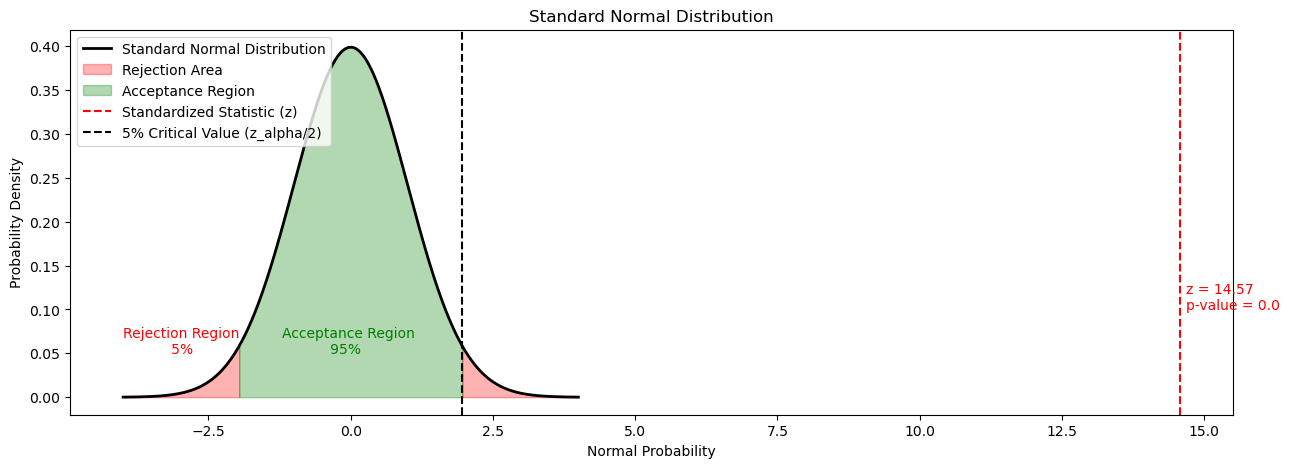

In [11]:
# Generate x values for the normal distribution plot
x = np.linspace(-4, 4, 1000)

# Calculate the y values for the normal distribution plot
y = norm.pdf(x, 0, 1)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the normal distribution curve
ax.plot(x, y, 'k-', linewidth=2, label='Standard Normal Distribution')

# Shade the area corresponding to the right rejection region
x_fill_r = np.linspace(z_alpha, 4, 100)
y_fill_r = norm.pdf(x_fill_r, 0, 1)
ax.fill_between(x_fill_r, y_fill_r, color='red', alpha=0.3, label='Rejection Area')

# Shade the area corresponding to the left rejection region
x_fill_l = np.linspace(-4,-z_alpha, 100)
y_fill_l = norm.pdf(x_fill_l, 0, 1)
ax.fill_between(x_fill_l, y_fill_l, color='red', alpha=0.3)

# Shade the area corresponding to the acceptance region
x_fill_critical = np.linspace(-z_alpha, z_alpha, 100)
y_fill_critical = norm.pdf(x_fill_critical, 0, 1)
ax.fill_between(x_fill_critical, y_fill_critical, color='green', alpha=0.3, label='Acceptance Region')

# Plot the vertical lines for the standardized statistic and critical value
ax.axvline(x=abs(z), color=z_line_color, linestyle='--', label='Standardized Statistic (z)')
ax.axvline(x=z_alpha, color='k', linestyle='--', label='5% Critical Value (z_alpha/2)')

# Set labels and title
ax.set_xlabel('Normal Probability')
ax.set_ylabel('Probability Density')
ax.set_title('Standard Normal Distribution')

# Add legends
ax.legend(loc = 2)

# Add annotations for p-value and critical region
ax.annotate(f'z = {abs(z.round(2))}\np-value = {pval_sp.round(2)}', xy=(abs(z) + 0.1, 0.1), color='red')
ax.annotate(f'Acceptance Region\n           95%', xy=(-1.2, 0.05), color='green')
ax.annotate(f'Rejection Region\n           5%', xy=(-4, 0.05), color='red')

# Show the plot
plt.show()

When I know that my two datasets have a monotonic but non-linear relationship. When my records are affected by outliers. If my dates are categorical and not numerical.
When I know that my two datasets have a monotonic but non-linear relationship. When my records are affected by outliers. If my dates are categorical and not numerical.### The scientist will decied as followed:
* Reject $H_0$ if $|z| > z_{\alpha/2}$    
* Accept $H_0$ if $|z| < z_{\alpha/2}$  


A p-value of 0 indicates that the observed correlation coefficient (in this case, Kendall's Tau correlation coefficient) is extremely unlikely to occur by chance alone, assuming the null hypothesis is true. The null hypothesis typically states that there is no correlation or association between the two variables being tested.

In practical terms, a p-value of 0 suggests strong evidence against the null hypothesis and provides support for the alternative hypothesis, which states that there is a significant correlation or association between the variables.

It's important to note that a p-value of 0 does not mean the observed correlation is perfect or that the relationship between the variables is practically significant. It only suggests that the observed correlation is highly unlikely to occur by chance.

When interpreting the results, it's also essential to consider the context and the magnitude of the correlation coefficient. The correlation coefficient itself provides information about the strength and direction of the association. A positive value indicates a positive correlation, meaning that as one variable increases, the other tends to increase as well. A negative value indicates a negative correlation, meaning that as one variable increases, the other tends to decrease.